不同于quantopian的IDE，我们直接使用`zipline`研究环境在Notebook中完成回测分析。

运行以下代码

In [1]:
# 回测结果默认存放路径"~/.backtest/"

In [2]:
from zipline.research import get_backtest

In [3]:
bt = get_backtest() # 这将获取最新的回测结果

In [4]:
# 查看回测结果数据
bt.data.tail()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-06-05 07:00:00+00:00,0.250542,-0.213208,-0.242928,0.161697,0.129223,0.862160,-26954.848285,50033.169418,7817888.41,7817888.41,...,0.0,0.0,0,-0.645578,76988.017703,7619569.30,7619569.30,346,"[{'amount': -1049, 'dt': 2018-06-05 07:00:00+0...",0.0
2018-06-06 07:00:00+00:00,0.250182,-0.212860,-0.240569,0.159291,0.129054,0.861807,0.000000,50033.169418,7821366.07,7821366.07,...,0.0,0.0,0,-0.643182,50033.169418,7817888.41,7817888.41,347,[],0.0
2018-06-07 07:00:00+00:00,0.249873,-0.218022,-0.243640,0.157376,0.128880,0.862192,26745.815820,76778.985238,7742996.57,7742996.57,...,0.0,0.0,0,-0.663758,50033.169418,7821366.07,7821366.07,348,"[{'amount': -1164, 'dt': 2018-06-07 07:00:00+0...",0.0
2018-06-08 07:00:00+00:00,0.249516,-0.219506,-0.235296,0.141849,0.129234,0.855814,0.000000,76778.985238,7728157.15,7728157.15,...,0.0,0.0,0,-0.669061,76778.985238,7742996.57,7742996.57,349,[],0.0
2018-06-11 07:00:00+00:00,0.249414,-0.230342,-0.244698,0.141960,0.129049,0.855992,0.000000,76778.985238,7619798.99,7619798.99,...,0.0,0.0,0,-0.712891,76778.985238,7728157.15,7728157.15,350,[],0.0


最大回撤,净回撤百分比,波峰日期,波谷日期,回本日期,回本天数
0,35.05,2017-03-24,2018-02-06,NaT,NaN
1,5.93,2017-01-04,2017-01-16,2017-03-07,45
2,1.05,2017-03-07,2017-03-09,2017-03-15,7
3,0.41,2017-03-16,2017-03-17,2017-03-20,3
4,0.19,2017-03-22,2017-03-23,2017-03-24,3


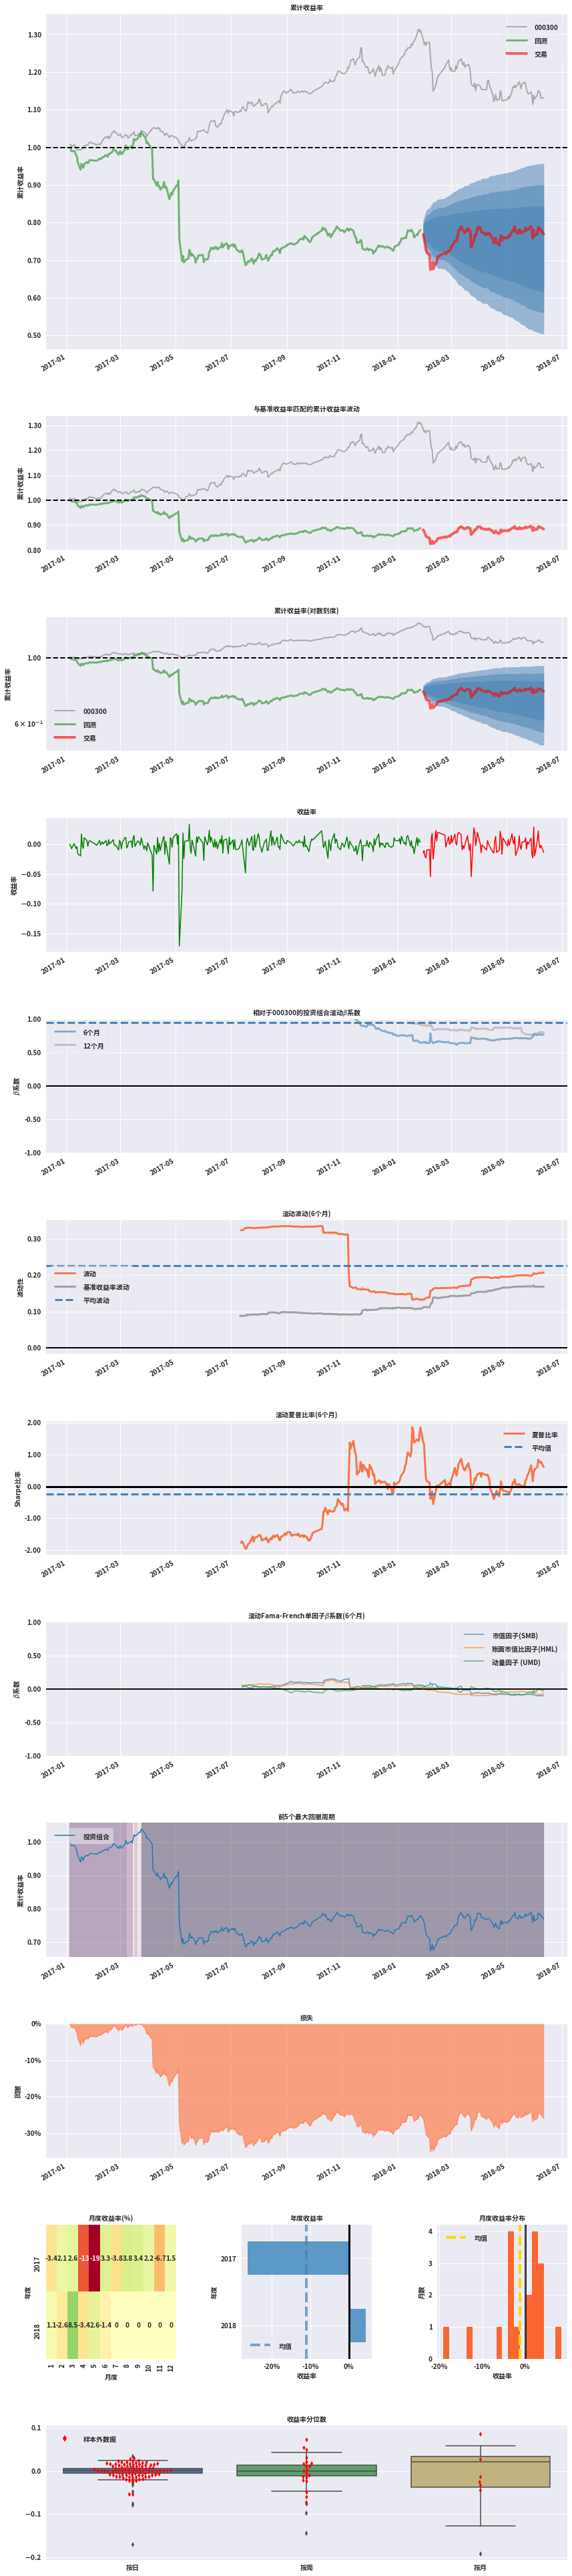

前十位多头头寸,max
sid,
600645,219.07%
600649,94.48%
000333,14.47%
300003,14.40%
300001,13.98%
300002,13.82%
002024,13.75%
300117,13.58%
600771,13.51%


前十位空头头寸,max
sid,


前十位总头寸,max
sid,
600645,219.07%
600649,94.48%
000333,14.47%
300003,14.40%
300001,13.98%
300002,13.82%
002024,13.75%
300117,13.58%
600771,13.51%


历史总头寸,max
sid,
600645,219.07%
600649,94.48%
000333,14.47%
300003,14.40%
300001,13.98%
300002,13.82%
002024,13.75%
300117,13.58%
600771,13.51%


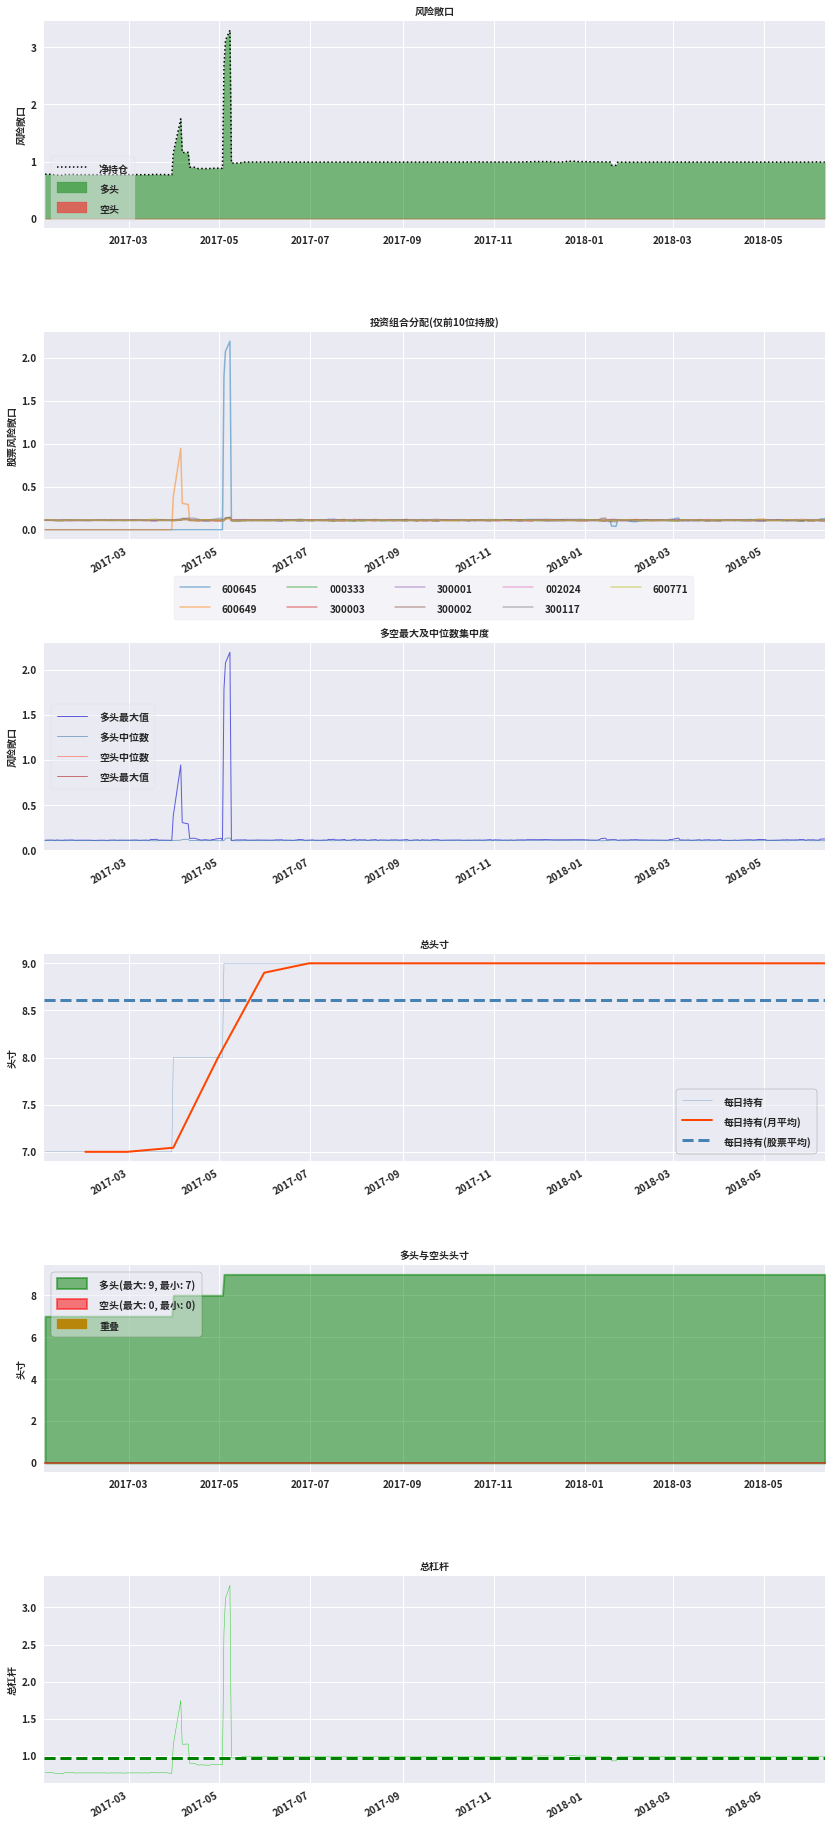

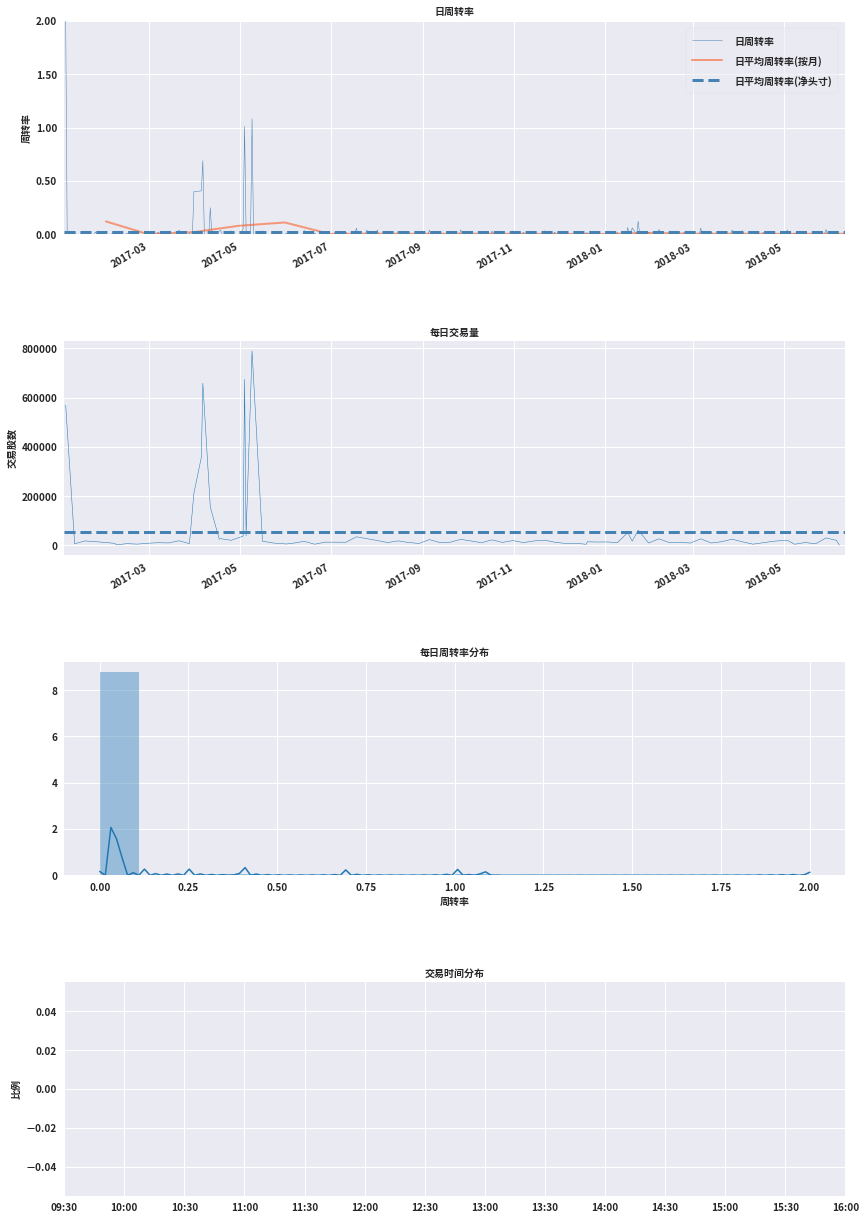

概要统计,所有交易,多头交易
完成交易总数,316.00,316.00
盈利比率,0.59,0.59
盈利次数,185.00,185.00
亏损次数,131.00,131.00
持平次数,0.00,0.00


盈亏统计,所有交易,多头交易
总利润,¥-2353501.77,¥-2353501.77
毛利润,¥2604438.09,¥2604438.09
毛亏损,¥-4957939.86,¥-4957939.86
盈亏因子,¥0.53,¥0.53
平均交易净利润,¥-7447.79,¥-7447.79
盈利交易平均值,¥14078.04,¥14078.04
亏损交易平均值,¥-37846.87,¥-37846.87
盈亏均值因子,¥0.37,¥0.37
交易最大盈利,¥337771.10,¥337771.10
交易最大亏损,¥-1715248.62,¥-1715248.62


周期统计,所有交易,多头交易
平均周期,245 days 12:42:43.319620,245 days 12:42:43.319620
中位数周期,240 days 12:00:00,240 days 12:00:00
最长周期,522 days 17:00:01,522 days 17:00:01
最短周期,5 days 00:00:00,5 days 00:00:00


收益率统计,所有交易,多头交易
所有已完成交易平均收益率,-0.09%,-0.09%
盈利交易平均收益率,0.18%,0.18%
亏损交易平均收益率,-0.48%,-0.48%
所有已完成交易中位数收益率,0.01%,0.01%
盈利交易中位数收益率,0.06%,0.06%
亏损交易中位数收益率,-0.02%,-0.02%
最大盈利率,4.33%,4.33%
最大亏损率,-24.57%,-24.57%


个股统计,000333,002024,300001,300002,300003,300117,600645,600649,600771
所有已完成交易平均收益率,0.18%,0.07%,-0.11%,-0.14%,0.18%,-0.05%,-0.90%,-1.07%,0.15%
盈利交易平均收益率,0.19%,0.14%,0.04%,0.00%,0.21%,0.20%,0.27%,nan%,0.15%
亏损交易平均收益率,-0.00%,-0.06%,-0.13%,-0.16%,-0.00%,-0.41%,-2.06%,-1.07%,-0.01%
所有已完成交易中位数收益率,0.10%,0.01%,-0.01%,-0.03%,0.06%,0.01%,-0.00%,-0.12%,0.03%
盈利交易中位数收益率,0.11%,0.04%,0.02%,0.00%,0.07%,0.06%,0.06%,nan%,0.03%
亏损交易中位数收益率,-0.00%,-0.02%,-0.02%,-0.05%,-0.00%,-0.03%,-0.01%,-0.12%,-0.01%
最大盈利率,2.27%,2.29%,0.10%,0.00%,4.33%,0.93%,1.74%,-0.00%,3.81%
最大亏损率,-0.01%,-0.45%,-2.63%,-2.29%,-0.01%,-4.69%,-24.57%,-12.14%,-0.01%


个股盈利能力(合计PnL/PnL),
symbol,
600649,89.26%
600645,62.87%
300002,16.06%
300001,11.51%
300117,3.98%
002024,-8.67%
600771,-23.08%
000333,-25.28%
300003,-26.66%


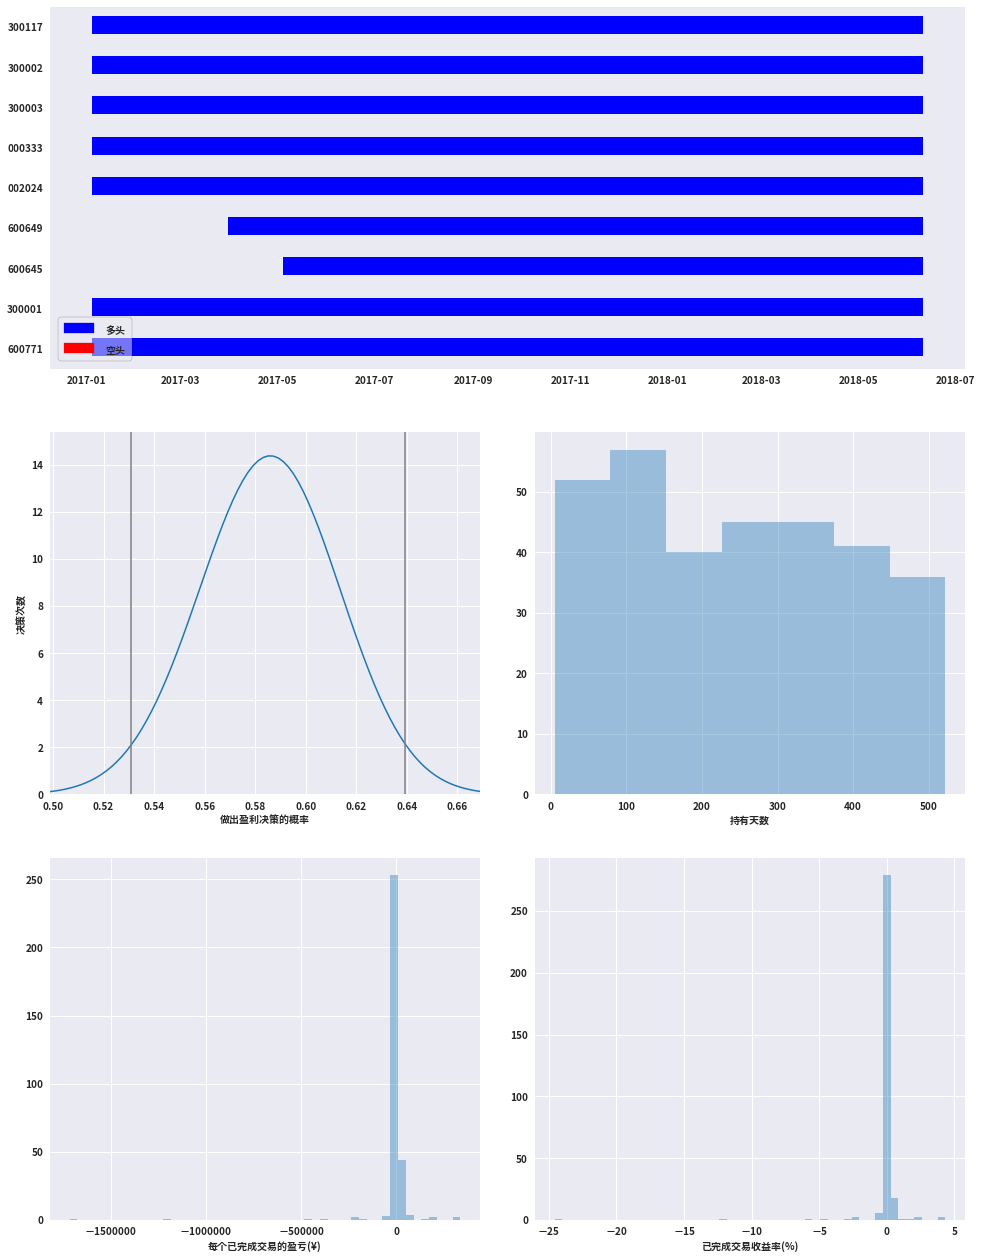

In [5]:
# 创建底稿
bt.create_full_tear_sheet()

当前`pyfolio`问题点：
+ 累计收益率
+ 有关共同风险与特质风险的计算

执行这个单元格（`Shift + Enter`）将回测生成的数据加载到研究笔记本中，并用它来创建`Pyfolio`底稿表。`Pyfolio`专用于投资组合和风险分析的开源工具。它提供了许多可视化工具，旨在帮助您更好地理解算法的行为和整个期间的风险敞口。

例如，下图显示了投资组合相对整个市场滚动风险敞口。想要构建多空等权交易算法的原因之一是保持与市场的低相关性，所以希望这个图在整个回测期间始终保持在0附近。

业绩归因是另一个有趣的部分。下图使用了风险模型来说明有多少收益可以归因于策略，其中有多少来自共同风险因子。

In [6]:
# 补充单独的图

可以从上图观察到，投资组合的大部分总收益都来自特定收益。 这表明算法的性能不是来自市场共同风险因子，这是一件好事。
祝贺您完成Quantitian入门教程！ 现在您已熟悉该平台的API，请尝试研究并制定自己的策略并将其提交给[竞赛](https://www.quantopian.com/contest)。
在您制定新策略时，请遵循我们的投资标准，以提高[从Quantopian获得资本分配](https://www.quantopian.com/allocation)的机会。如果您需要创意，请查看[讲座系列](https://www.quantopian.com/lectures)以了解更多关于量化金融的信息，或查看其他成员在[社区](https://www.quantopian.com/posts/tag/futures)中分享的想法。